In [ ]:
#@title Librerías
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
2*np.random.random(5)-1

array([-0.09774321, -0.36156874, -0.9500792 , -0.23274405, -0.4428135 ])

In [ ]:
N = 100
rng = 0.5*(2*np.random.random(N)-1)
x = np.linspace(0,10,100)
b = 2
y = 2.1*(x+rng) + b

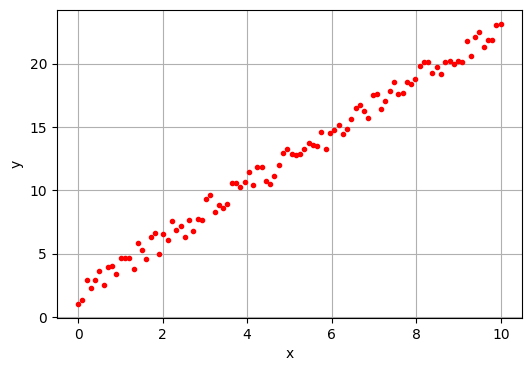

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(x,y,'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [ ]:
from scipy.optimize import curve_fit 

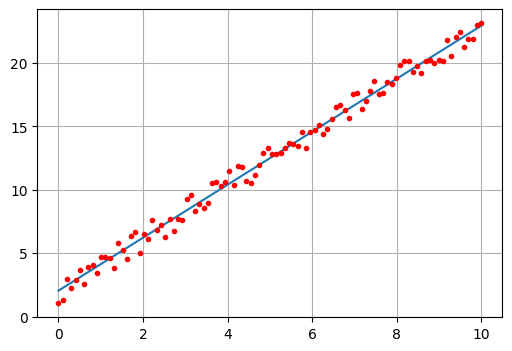

In [ ]:
def f(x,a,b): return a*x + b

x = np.linspace(0,10,100)
y = 2.1*(x+rng) + b

fit = curve_fit(f, x, y)
plt.figure(figsize=(6,4))
plt.plot(x,f(x,fit[0][0], fit[0][1]))
plt.plot(x,y,'r.')
plt.grid()

In [87]:
file = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRdgSKhgrKh0PWJkCHIKcNFi1dsJptWsI_yzTI81YvvSqO-yUmRDpMMuHBXKEAOzq4Af7F4rXyDLWjW/pub?output=csv'
df = pd.read_csv(file, sep=';', decimal='.')                                   #Cambiar ; por .
df = df.rename(columns={'Tiempo (ms)':'Tiempo_ms', 'Ángulo 1,':'AnguloDeg'}) #Cambiar nombre a las columnas
df.AnguloDeg = df.AnguloDeg.str.replace(',','.').astype(float)                 #Cambiar , por . y volverlo de sting a float
df['AnguloRad'] = np.deg2rad(df.AnguloDeg)                                     #Agregar columna con ángulos en radianes usando numpy
df

,Tiempo_ms,AnguloDeg,AnguloRad
0,9,59.289612,1.034799
1,42,59.982327,1.046889
2,75,61.237453,1.068795
3,108,63.492477,1.108153
4,142,65.388771,1.141249
...,...,...,...
2842,94709,94.937576,1.656973
2843,94743,96.479851,1.683891
2844,94776,97.940689,1.709387
2845,94809,99.318092,1.733428


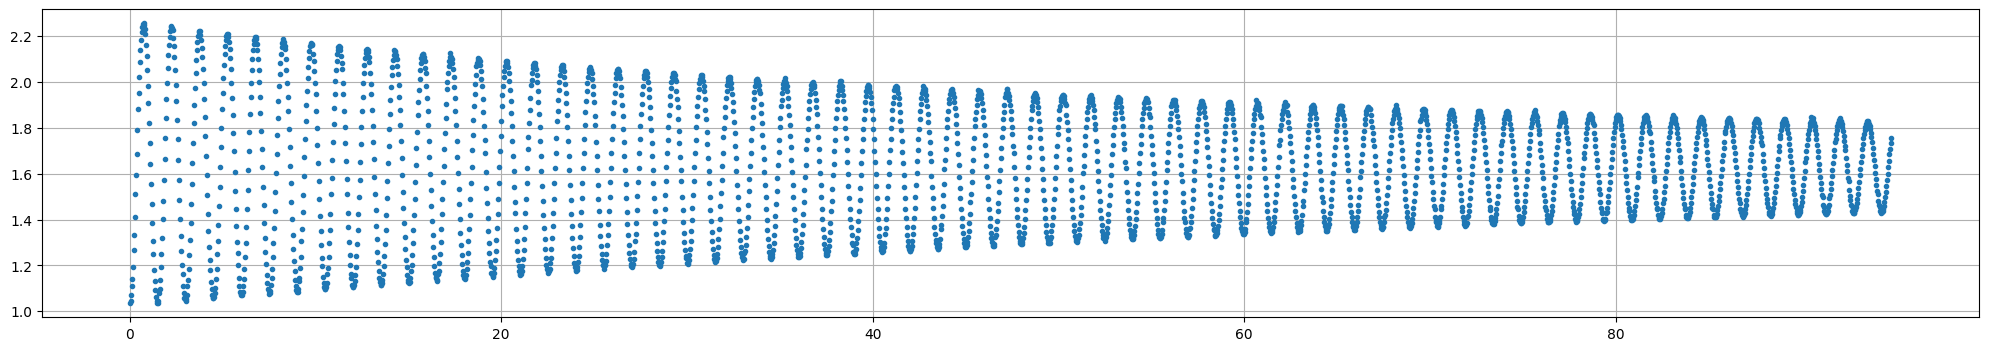

In [146]:
plt.figure(figsize=(25,4))
plt.plot(df.Tiempo_ms/1000, df.AnguloRad, '.')
plt.grid()

<ipython-input-183-f961cf2a62bb>:1: RuntimeWarning: overflow encountered in exp
  def f(t,A,omega, phi, b,C): return A*np.cos(omega*t + phi)*np.exp(-b*t) + C


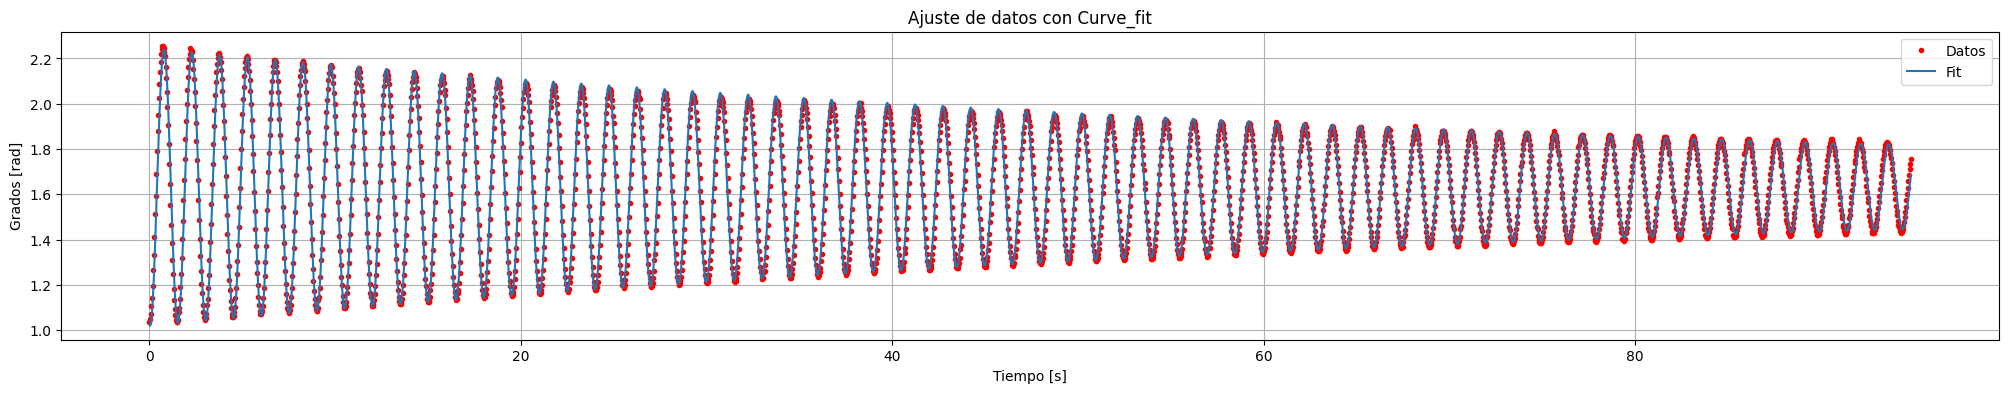

In [183]:
def f(t,A,omega, phi, b,C): return A*np.cos(omega*t + phi)*np.exp(-b*t) + C

x_ = np.linspace(min(df.Tiempo_ms/1000),max(df.Tiempo_ms/1000), 10000 )

t = np.array(df.Tiempo_ms/1000)
y = np.array(df.AnguloRad)

fit = curve_fit(f, t, y)
plt.figure(figsize=(25,4))
plt.title('Ajuste de datos con Curve_fit')
plt.plot(x,y,'.',color='red',label='Datos')
plt.plot(x_,f(x_,fit[0][0],fit[0][1], fit[0][2], fit[0][3], fit[0][4]), label='Fit')
plt.xlabel('Tiempo [s]')
plt.ylabel('Grados [rad]')
plt.legend()
plt.grid()